In [47]:
library(tidyverse)

── Attaching core tidyverse packages ────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ──────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[Plot a ROC curve in R without using any packages - Stack Overflow](https://stackoverflow.com/questions/41754220/plot-a-roc-curve-in-r-without-using-any-packages)

## Step by step

In [32]:
set.seed(100)
actuals <- sample(c(TRUE,FALSE), 100, replace = TRUE)
scores  <- runif(100,-1,1)

dat = data.frame(actuals, scores)
head(dat)

,actuals,scores
,<lgl>,<dbl>
1,FALSE,-0.3451698
2,TRUE,-0.2210426
3,FALSE,-0.9178945
4,FALSE,-0.2772067
5,TRUE,0.1419562
6,TRUE,0.3697605


In [33]:
actuals    <- actuals[order(scores)]
thresholds <- sort(scores)

pos <- sum(actuals)
neg <- sum(!actuals)

In [34]:
tn   <- cumsum(!actuals)
spec <- tn/neg

In [35]:
tp   <- pos - cumsum(actuals)
sens <- tp/pos

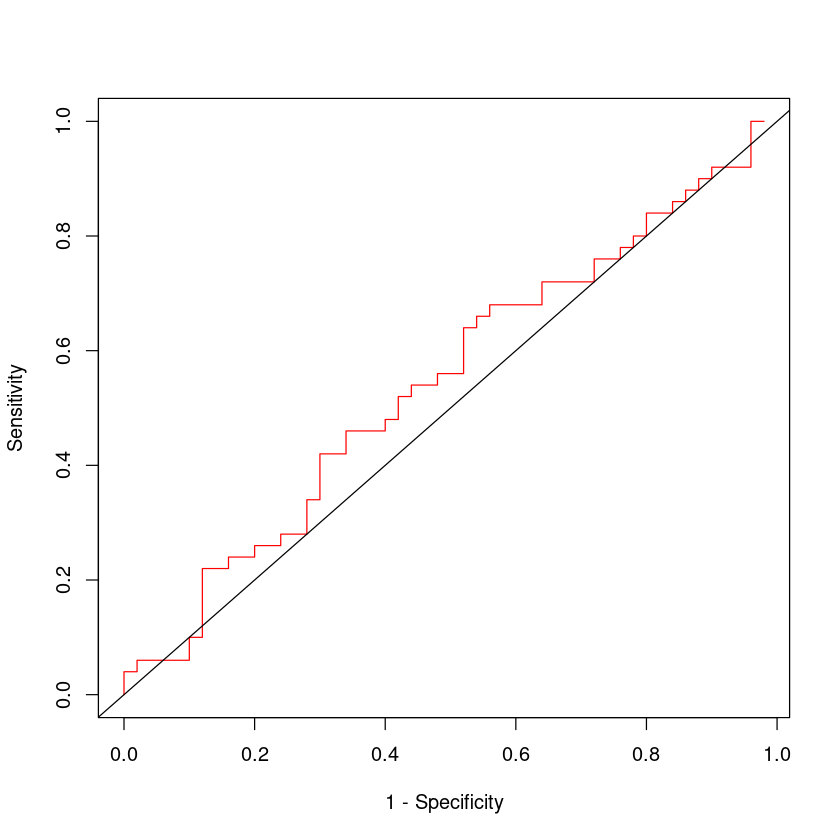

In [36]:
plot(1 - spec, sens, type = "l", col = "red", 
     ylab = "Sensitivity", xlab = "1 - Specificity")
abline(c(0,0),c(1,1))

In [37]:
width <- diff(c(0, 1 - sens))
auc <- sum(spec*width)
print(auc)

[1] 0.5444


## Short code

In [38]:
set.seed(100)
actuals <- sample(c(TRUE,FALSE), 100, replace = TRUE)
scores  <- runif(100,-1,1)

dat = data.frame(actuals, scores)
head(dat)

,actuals,scores
,<lgl>,<dbl>
1,FALSE,-0.3451698
2,TRUE,-0.2210426
3,FALSE,-0.9178945
4,FALSE,-0.2772067
5,TRUE,0.1419562
6,TRUE,0.3697605


[1] 0.5444

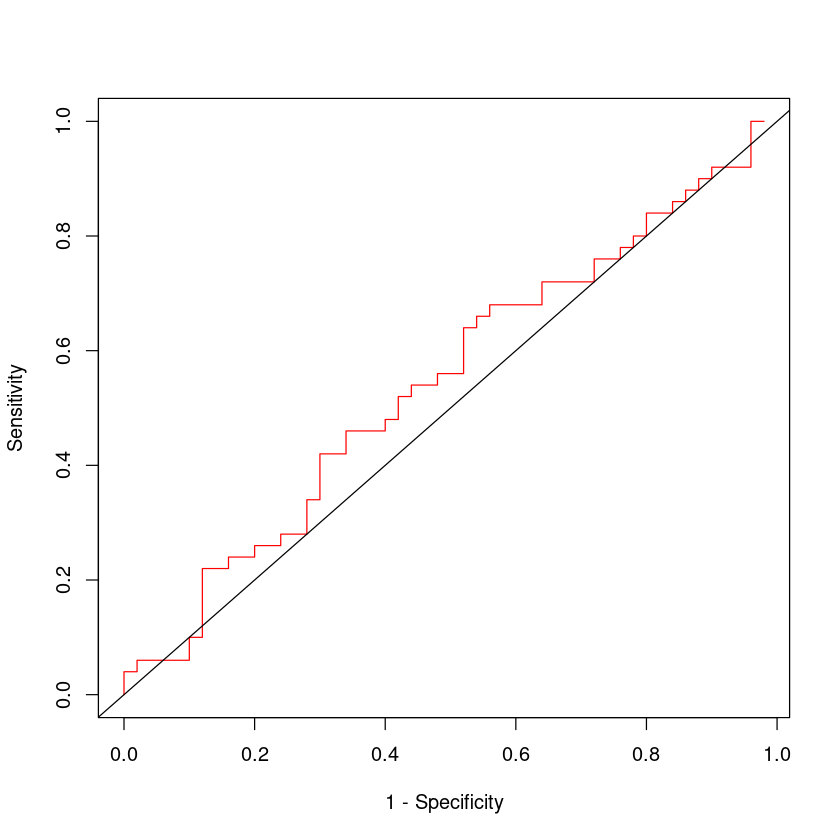

In [39]:
actuals <- actuals[order(scores)]

sens <- (sum(actuals) - cumsum(actuals))/sum(actuals)
spec <- cumsum(!actuals)/sum(!actuals)

plot(1 - spec, sens, type = "l", col = "red", 
     ylab = "Sensitivity", xlab = "1 - Specificity")
abline(c(0,0),c(1,1))

(auc <- sum(spec*diff(c(0, 1 - sens))))

## Wrap in function

In [40]:
fun_auroc = function(vec_boo_actual, vec_num_score) {
    ###
    idx = order(vec_num_score)
    vec = vec_boo_actual[idx]
    
    ###
    vec_num_sens = (sum(vec) - cumsum(vec))/sum(vec)
    vec_num_spec = cumsum(!vec)/sum(!vec)
    
    ###
    num_width = diff(c(0, 1 - vec_num_sens))
    num_auc   = sum(vec_num_spec * num_width)

    ### 
    lst = list(
        "Specificity" = vec_num_spec,
        "Sensitivity" = vec_num_sens,
        "AUROC"       = num_auc
    )
    return(lst)
}

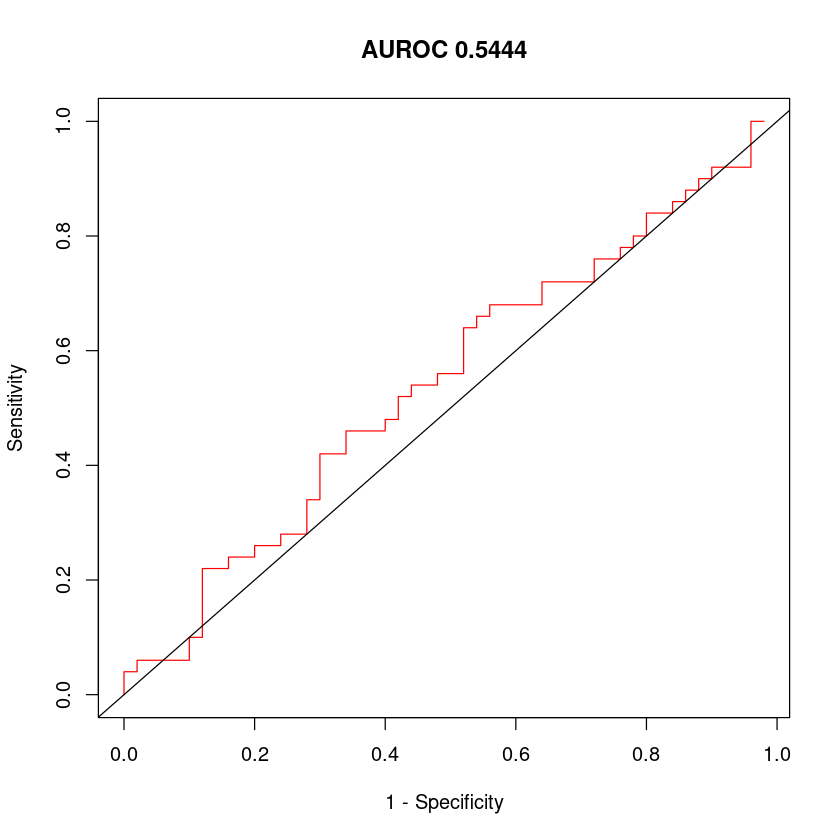

In [55]:
###
set.seed(100)
actuals <- sample(c(TRUE,FALSE), 100, replace = TRUE)
scores  <- runif(100,-1,1)

###
lst = fun_auroc(actuals, scores)
vec_num_spec = lst[["Specificity"]]
vec_num_sens = lst[["Sensitivity"]]
num_auroc    = lst[["AUROC"]]

###
plot(1 - vec_num_spec, 
     vec_num_sens, 
     type = "l", 
     col = "red", 
     main = paste("AUROC", num_auroc),
     ylab = "Sensitivity", 
     xlab = "1 - Specificity")
abline(c(0,0), c(1,1))

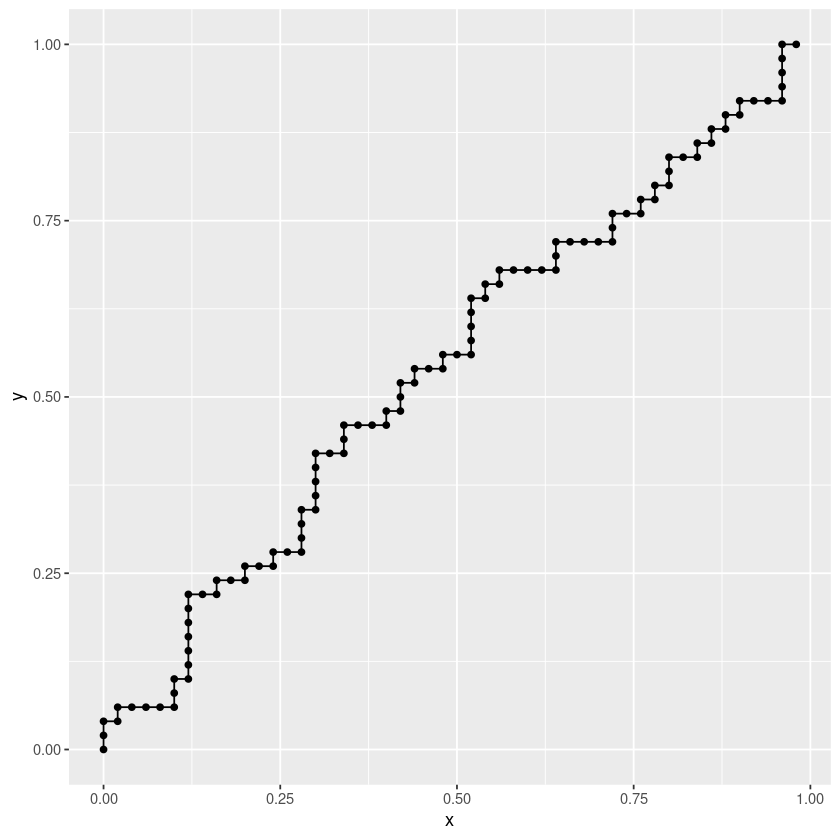

In [59]:
lst = fun_auroc(actuals, scores)
vec_num_spec = lst[["Specificity"]]
vec_num_sens = lst[["Sensitivity"]]
num_auroc    = lst[["AUROC"]]

txt = paste("AUROC", num_auroc)
dat = data.frame(
    "x" = 1 - lst[["Specificity"]],
    "y" = lst[["Sensitivity"]]
)
dat = dat %>% dplyr::arrange(x, y)
gpt = ggplot(dat, aes(x=x, y=y)) +
    geom_line() +
    geom_point()
print(gpt)

[Generate ROC Curve Charts for Print and Interactive Use](https://cran.r-project.org/web/packages/plotROC/vignettes/examples.html)

In [61]:
set.seed(2529)
D.ex <- rbinom(200, size = 1, prob = .5)
M1   <- rnorm(200, mean = D.ex, sd = .65)
M2   <- rnorm(200, mean = D.ex, sd = 1.5)

test <- data.frame(D = D.ex, D.str = c("Healthy", "ill")[D.ex + 1], 
                   M1 = M1, M2 = M2, stringsAsFactors = FALSE)
test

D,D.str,M1,M2
<int>,<chr>,<dbl>,<dbl>
1,ill,1.48117155,-2.50636605
1,ill,0.61994478,1.46861033
0,Healthy,0.57613345,0.07532573
1,ill,0.85433197,2.41997703
0,Healthy,0.05258342,0.01863718
1,ill,0.66703989,0.24732453
0,Healthy,-0.47572307,-1.15965934
0,Healthy,0.28262423,1.19454939
1,ill,1.70078111,-1.65088788


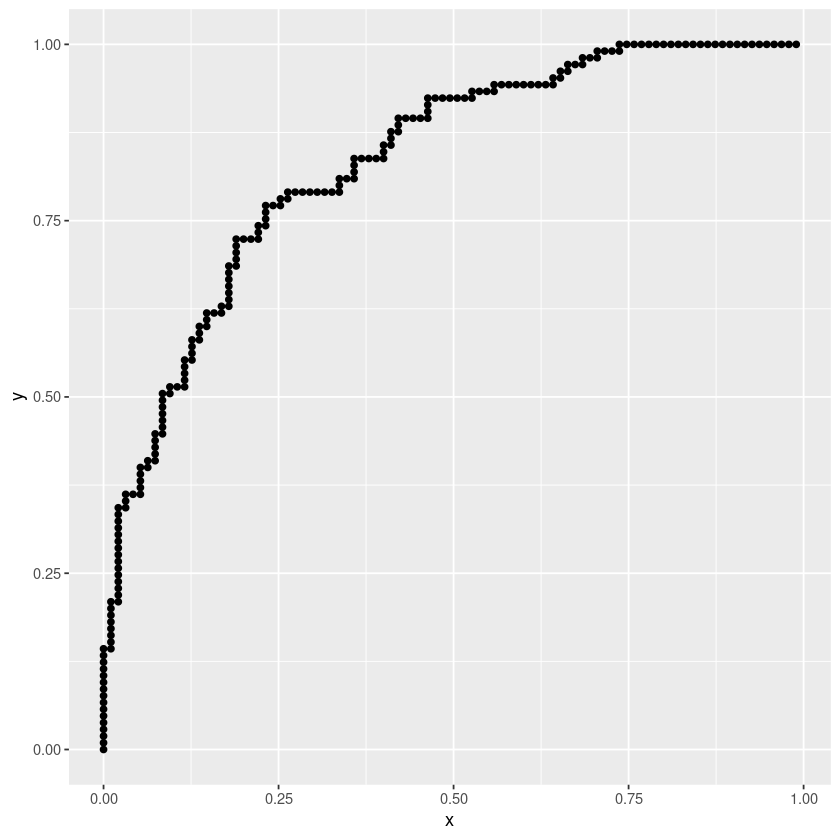

In [64]:
vec_boo_actual = (D.ex == 1)
vec_num_score  = M1

lst = fun_auroc(vec_boo_actual, vec_num_score)
vec_num_spec = lst[["Specificity"]]
vec_num_sens = lst[["Sensitivity"]]
num_auroc    = lst[["AUROC"]]

txt = paste("AUROC", num_auroc)
dat = data.frame(
    "x" = 1 - lst[["Specificity"]],
    "y" = lst[["Sensitivity"]]
)
dat = dat %>% dplyr::arrange(x, y)
gpt = ggplot(dat, aes(x=x, y=y)) +
    geom_line() +
    geom_point()
print(gpt)